In [54]:
import numpy as np
import pandas as pd
df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [55]:
df.info() #check if there are any missing values, check the data type, no of rows, column description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [56]:
df.describe() # data distribution in each attribute

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [57]:
# findings
#1. Minimum age of the customer is 25 and maximum age of customer is 67.
#2. 50% of the customers falls around 45 yrs of age. 25% of customers are around 35 years of age. There is more scope under this age group that they can convert to asset customers.

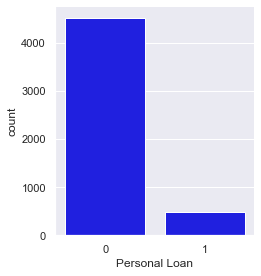

In [58]:
#target column is Personal loan. To convert the '0's in the Personal column to '1's is the target of the bank.
import seaborn as sns
import matplotlib.pyplot as plt
#ax = sns.barplot(x="Age", y="Personal Loan", data=df)
ax=sns.catplot(x="Personal Loan", data=df, kind="count",height=4, aspect=.9,color= "blue");
#pd.value_counts(df['Personal Loan']).plot.bar()

In [59]:
from sklearn.model_selection import train_test_split
X=df.drop(['Personal Loan'], axis=1)
Y=df['Personal Loan']
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3) #30% taken as test data and 70 % considered as training data set

In [60]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, Y_train)
y_pred_GNB=clf_GNB.predict(X_test)
y_pred_GNB

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_GNB)

0.896

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred_GNB)
print(confusion_matrix)

[[1255  110]
 [  46   89]]


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model=LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\shanmugapriya.p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
prediction=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, prediction)

0.9186666666666666

In [65]:
from sklearn.metrics import f1_score
f1_score(Y_test, prediction,average='macro')

0.7150313932629061

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=5)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,Y_train)
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,Y_test))
print("What is the Training Accuracy")
print(knn.score(scaledX_train,Y_train))
predicted = knn.predict(scaledX_test)
print(confusion_matrix(Y_test,predicted))
print(confusion_matrix(Y_test,predicted)[1,0])

What is the Testing Accuracy
0.954
What is the Training Accuracy
0.9605714285714285
[[1356    9]
 [  60   75]]
60


In [ ]:
# Knn model has the highest accuracy compared to logistic regression and Naive Bayes so KNN method is the best for this case.